In [39]:
!pip install opencv-python

!pip install tensorflow==1.13.1
!pip install keras==2.2.4
!pip install h5py==2.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.8 MB 6.8 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0


# Download dataset from keras package and preparation of data as npy files

# Designed to understand and get hands on about data preparation stages while reading a single image or a batch of images.

# CIFAR-10

Each image in CIFAR dataset is a 32x32 (image rows, image columns) dimensions and a RGB image constituting of 10 different categories of the iamge.

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

Mounted at /content/gdrive
[INFO] loading CIFAR10 data
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10) (10000, 10)
automobile


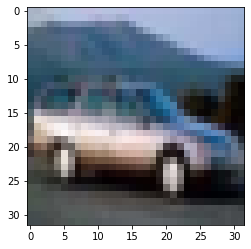

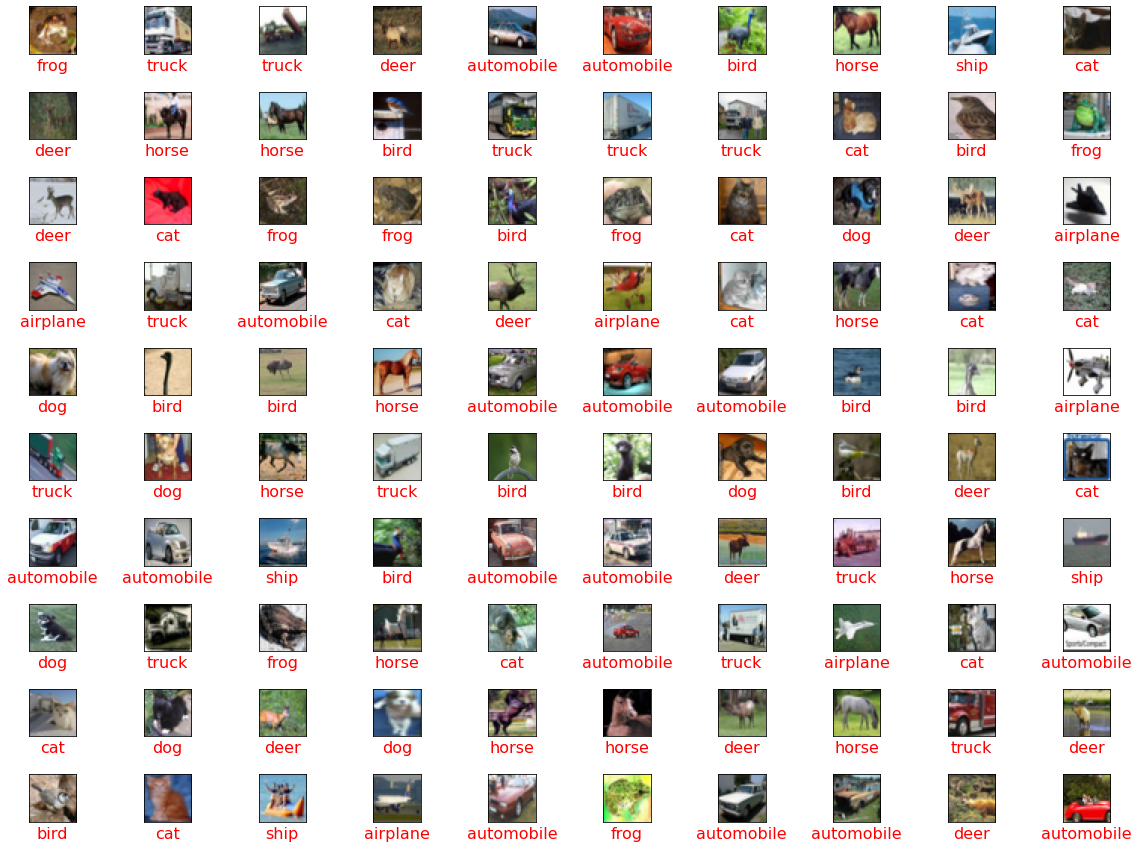

float64
float64


In [1]:
from tensorflow.python.keras.datasets import cifar10

import numpy as np
from tensorflow.python.keras.utils import np_utils
#from keras.models import Sequential
from tensorflow.python.keras.layers.core import Dense, Dropout, Activation, Flatten
from tensorflow.python.keras.layers.convolutional import Conv2D
from tensorflow.python.keras.layers.convolutional import MaxPooling2D
from tensorflow.python.keras.layers import Input
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.optimizers import SGD, RMSprop, adam
import os

#################################################################################
##### Mount Google drive ########################################################
#################################################################################

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

#################################################################################
##### Mount Google drive ########################################################
#################################################################################


def save_npy_files(trainX, Y_train, testX, Y_test, npy_save_dir):
    np.savez(os.path.join(npy_save_dir, 'ret_cifar_train'), trainX, Y_train)
    np.savez(os.path.join(npy_save_dir, 'ret_cifar_test'), testX, Y_test)

##################################################################################
##### create save dir on the mounted google drive ################################
##################################################################################

npy_save_dir = '/content/gdrive/MyDrive/Colab Notebooks/CIFAR_npy_data'

if not os.path.exists(npy_save_dir):
  os.mkdir(npy_save_dir)

##################################################################################
############ LOAD CIFAR10 ########################################################
##################################################################################

print("[INFO] loading CIFAR10 data")

((trainX, trainY), (testX, testY)) = cifar10.load_data()

############################  Sanity check ###############################################   
print(trainX.shape)
print(testX.shape)
############################  Sanity check ###############################################   

np.random.seed(123)

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(trainY, 10)
Y_test = np_utils.to_categorical(testY, 10)
print(Y_train.shape, Y_test.shape)

########## Visualise images and class labels ###############################################

labelNames=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
print(labelNames[int(trainY[4])])
import matplotlib.pyplot as plt
%matplotlib inline


# Visualise a single image
plt.imshow(trainX[4])
plt.show()


def plot_images(images,class_label):
    fig,axes=plt.subplots(10, 10, figsize=(20, 15))
    fig.subplots_adjust(hspace=0.8, wspace=0.4)
    
    for i,ax in enumerate(axes.flat):
        ax.imshow(trainX[i])
        xlab=labelNames[int(trainY[i])]
        ax.set_xlabel(xlab,fontsize=16)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.xaxis.label.set_color('red')
    plt.show()


# Visualize the batch of training images to explore the image pixels and data      
images=trainX[0:100]
cls=trainY[0:100]
plot_images(images,cls)

trainX=trainX.astype("float")/255.0
testX=testX.astype("float")/255.0

print(trainX.dtype)
print(testX.dtype)

############ save the loaded data ###############################################
#save_npy_files(trainX,Y_train, testX, Y_test, npy_save_dir)

Mounted at /content/gdrive
roses
tulips
sunflowers
0


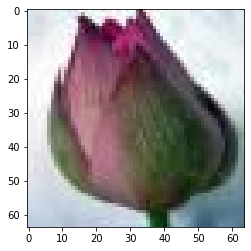

(1059, 64, 64, 3)
(1059,)
(1059, 3)
[1. 0. 0.]
1059
0
4
8
12
16
20
24
28
32
36
40
44
48
52
56
60
64
68
72
76
80
84
88
92
96
100
104
108
112
116
120
124
128
132
136
140
144
148
152
156
160
164
168
172
176
180
184
188
192
196
200
204
208
212
216
220
224
228
232
236
240
244
248
252
256
260
264
268
272
276
280
284
288
292
296
300
304
308
312
316
320
324
328
332
336
340
344
348
352
356
360
364
368
372
376
380
384
388
392
396
400
404
408
412
416
420
424
428
432
436
440
444
448
452
456
460
464
468
472
476
480
484
488
492
496
500
504
508
512
516
520
524
528
532
536
540
544
548
552
556
560
564
568
572
576
580
584
588
592
596
600
604
608
612
616
620
624
628
632
636
640
644
648
652
656
660
664
668
672
676
680
684
688
692
696
700
704
708
712
716
720
724
728
732
736
740
744
748
752
756
760
764
768
772
776
780
784
788
792
796
800
804
808
812
816
820
824
828
832
836
840
844
848
852
856
860
864
868
872
876
880
884
888
892
896
900
904
908
912
916
920
924
928
932
936
940
944
948
952
956
960
964
968
972


In [2]:
import os
import numpy as np
import cv2
import glob
import h5py

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

img_dir = r'/content/gdrive/MyDrive/Colab Notebooks/flower_64/train'

label_name = []
label_cpt = 0
X_data = []
y_data = []
for class_dir in os.listdir(img_dir):
    print(class_dir)
    for img in os.listdir(os.path.join(img_dir,class_dir)):
        
          img_x = cv2.imread(os.path.join(img_dir, class_dir, img))
          img_x = cv2.cvtColor(img_x, cv2.COLOR_BGR2RGB)
          # img_x = img_x/255
          X_data.append(img_x)
          y_data.append(label_cpt)
    label_name.append(class_dir)
    label_cpt += 1  # Label id incrementation

#print(label_cpt)

############### Image co-ordinates and numpy arrays ################################
import matplotlib.pyplot as plt
print(y_data[1])
plt.imshow(X_data[1])
plt.show()


X_data = np.array(X_data, dtype=np.float32)
y_data = np.array(y_data)
print(X_data.shape)
print(y_data.shape)

#np.random.seed(123)

# convert class vectors to binary class matrices
Y_data = np_utils.to_categorical(y_data, label_cpt)

print(Y_data.shape)
print(Y_data[0])
print(X_data.shape[0])


Train_Data_save_name = 'TrainData_AN.h5'

hf = h5py.File(os.path.join(npy_save_dir, Train_Data_save_name), 'w-')
data_set = hf.create_dataset("data", (1, 64, 64, 3), maxshape=(None, 64, 64, 3), dtype='float32')
label_set = hf.create_dataset("labels", (1, 1), maxshape=(None, 1), dtype='float32')
itr = 0

for Train_n in range(0, X_data.shape[0]):
    # print(Train_n)
    data = X_data[Train_n]
    labels = np.array(y_data[Train_n])
    #print(labels.shape)
    # labels = np.expand_dims(labels, axis=1)
    # print(labels.shape)
    # print(labels[0])
    data_set.resize(((itr + 1), 64, 64, 3))
    label_set.resize(((itr + 1), 1))
    print(itr)
    data_set[itr, :, :, :] = data
    label_set[itr, :] = labels
    itr = itr + 1
    data_set.resize(((itr + 1), 64, 64, 3))
    label_set.resize(((itr + 1), 1))
    data_set[itr, :, :, :] = np.fliplr(data)
    label_set[itr, :] = labels
    itr = itr + 1
    data_set.resize(((itr + 1), 64, 64, 3))
    label_set.resize(((itr + 1), 1))
    data_set[itr, :, :, :] = np.flipud(data)
    label_set[itr, :] = labels
    itr = itr + 1
    data_set.resize(((itr + 1), 64, 64, 3))
    label_set.resize(((itr + 1), 1))
    itr = itr + 1
    
hf.close()

###################### validation files #########################################

img_dir = r'/content/gdrive/MyDrive/Colab Notebooks/flower_64/valid'

label_name = []
label_cpt = 0
X_data = []
y_data = []
for class_dir in os.listdir(img_dir):
    print(class_dir)
    for img in os.listdir(os.path.join(img_dir,class_dir)):
        
          img_x = cv2.imread(os.path.join(img_dir, class_dir, img))
          img_x = cv2.cvtColor(img_x, cv2.COLOR_BGR2RGB)
          # img_x = img_x/255
          X_data.append(img_x)
          y_data.append(label_cpt)
    label_name.append(class_dir)
    label_cpt += 1  # Label id incrementation

#print(label_cpt)

############### Image co-ordinates and numpy arrays ################################
# import matplotlib.pyplot as plt
# print(y_data[1])
# plt.imshow(X_data[1])
# plt.show()
############### Image co-ordinates and numpy arrays ################################

X_data = np.array(X_data, dtype=np.float32)
y_data = np.array(y_data)
print(X_data.shape)
print(y_data.shape)

#np.random.seed(123)

# convert class vectors to binary class matrices
Y_data = np_utils.to_categorical(y_data, label_cpt)

print(Y_data.shape)
print(Y_data[0])
print(X_data.shape[0])


Valid_Data_save_name = 'ValidData_AN.h5'

hf = h5py.File(os.path.join(npy_save_dir, Valid_Data_save_name), 'w-')
data_set = hf.create_dataset("data", (1, 64, 64, 3), maxshape=(None, 64, 64, 3), dtype='float32')
label_set = hf.create_dataset("labels", (1, 1), maxshape=(None, 1), dtype='float32')
itr = 0

for Valid_n in range(0, X_data.shape[0]):
    # print(Train_n)
    data = X_data[Valid_n]
    labels = np.array(y_data[Valid_n])
    
    data_set.resize(((itr + 1), 64, 64, 3))
    label_set.resize(((itr + 1), 1))
    print(itr)
    data_set[itr, :, :, :] = data
    label_set[itr, :] = labels
    itr = itr + 1

hf.close()



In [4]:
import h5py

import glob
import os
import numpy as np

print(h5py.__version__)

from google.colab import drive
drive.mount('/content/gdrive')

data_dir = '/content/gdrive/MyDrive/Colab Notebooks/CIFAR_npy_data'
data_h5 = os.path.join(data_dir,'TrainData_AN.h5')
print(data_h5)

train_h5 = h5py.File(data_h5, 'r')
print(train_h5)

train_X1 = train_h5['data']
train_y1 = train_h5['labels']

#######################  Note find the way to access data and labels there is version issue with the colab and the local cpu ######################

#train_X1._

# print(np.min(train_y1._dset.value), np.max(train_y1._dset.value))
# print(train_y1._dset[0].dtype)

# print(train_X1._dset[0].shape)
# print(train_X1._dset[0].dtype)

test_img = (train_X1._dset[0]).astype(np.uint8)

import matplotlib.pyplot as plt
plt.imshow(test_img)
plt.show()

# trainX, trainY = np.asarray(train_h5['data']).astype(np.float), np.asarray(train_h5['labels']).astype(np.uint8)

# print(trainX[0])

# import numpy as np


# def h5read(filename, data_name):
#     file = h5py.File(filename)
#     data = file[data_name + '/data'].value
#     shape = file[data_name + '/shape'].value
#     data = data.reshape(shape, order='F')

#     file.close()
#     return data


# def h5write(filename, data_to_save, name_data):
#     file = h5py.File(filename, 'w')
#     data = data_to_save.ravel(order='F')
#     shape = np.array(data_to_save.shape)
#     file.create_dataset(name_data + '/data', data.shape, dtype=data.dtype, data=data,
#                         chunks=True, compression="gzip", compression_opts=5)
#     file.create_dataset(name_data + '/shape', shape.shape, dtype=shape.dtype, data=shape,
#                         chunks=True, compression="gzip", compression_opts=5)
#     file.close()


2.9.0
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Colab Notebooks/CIFAR_npy_data/TrainData_AN.h5
<HDF5 file "TrainData_AN.h5" (mode r)>


AttributeError: ignored